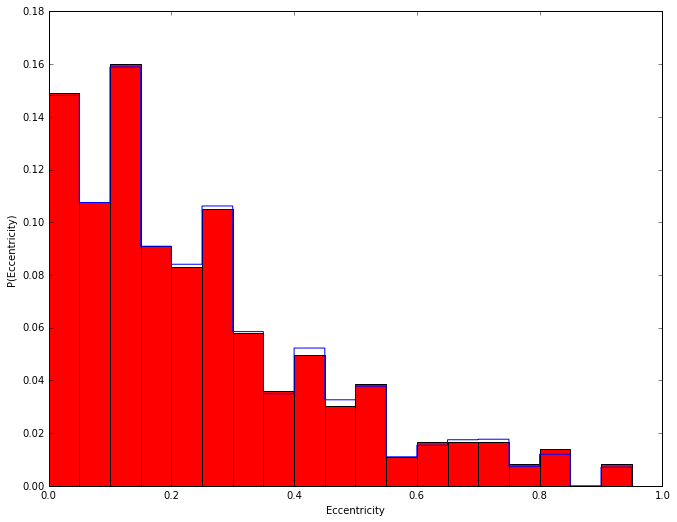

In [121]:
from astropy.table import QTable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# change the data for the kepler data, and graphs below
data = QTable.read('probecc_comma.dat',format='ascii.no_header')


data.rename_column('col1','ecc')
data.rename_column('col2','% in bin')
data.rename_column('col3','cum %')
x = np.arange(0,1,0.05)
ecc_inbin = data['% in bin']
cum=data['cum %']
binwidth = 0.05
fig,ax=plt.subplots(1,1)
fig.set_size_inches(11,8.5)                  

bar = ax.bar(data['ecc'],ecc_inbin,width=0.05,color='r')
ax.set_xlabel('Eccentricity')
ax.set_ylabel('P(Eccentricity)')

n = 1
ecc_list = np.array([])
while n <= 25000:
    r = (np.random.sample(1)) #some y value (percentage)
    #Tracer()()
    if r <= 0.149171270718232:
        bin_lower=0.0
        bin_upper=0.05
    else:
        r_mask = np.where(y<=r)
        x_below = x[r_mask]
        x_below = np.append(x_below,x_below[-1]+0.05)
        bin_upper = x_below[-1]+0.05
        bin_lower = x_below[-2]+0.05
    rand = np.random.uniform(0,0.05,1)
    ecc = bin_lower + rand 
    ecc_list=np.append(ecc_list,ecc)
    n += 1
    continue
ecc_hist = ax.hist(ecc_list,bins=x,weights=np.zeros_like(ecc_list)+1./ecc_list.size,histtype='step')

[ 0.58132804] =r 
 (array([0, 1, 2, 3]),) =r_mask(indices) 
 [ 0.    0.05  0.1   0.15  0.2 ] bins(last is right edge) 
 4 index of right edge 
    % in bin   
--------------
0.149171270718
0.256906077348
0.417127071823
0.508287292818
0.591160220994


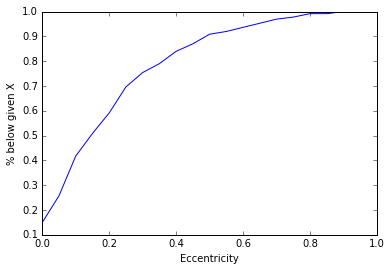

In [2]:

# Sanity check, pick some range of y and spit out x and compare to original 
'''
to create cumdist, need a line where x is 0 to 1 and y is 0 to 1. 
each point is the sum of all the previous points (the third column in the data)
'''
fig,ax=plt.subplots(1,1)
x = np.arange(0,1,0.05)
y = data['cum %']
#y = np.array(y)
ax.plot(x,y,c='blue')
ax.set_xlabel('Eccentricity')
ax.set_ylabel('% below given X')

#sanity check


    
    
r = (np.random.sample(1))
if r >= 0.25 and r <= 0.75:
    r_mask = np.where(y<=r)
else:
    r_mask = np.where(y==y) # doesnt apply any masking, x_below = x
    
x_below = x[r_mask]
x_below = np.append(x_below,x_below[-1]+0.05) # to include the bin in which r belongs
max_index = np.argmax(x_below) 
max_range = x_below[-1]


# now set r = y and find all values of x that are less than that percent
#now add (% in bin) up to b_max, and compare cumsum 
sanity_check = np.cumsum(ecc_inbin[0:max_index+1])
print(r,'=r','\n',r_mask,'=r_mask(indices)','\n',x_below,'bins(last is right edge)','\n',max_index,'index of right edge','\n',sanity_check)

In [133]:
# make 25000 ICs w/ mass, radii, Q, ecc., period and histogram of each; 25 bins per parameter
# in data, the last column is upper bound for the bin, where bin_upper is the next line's eccentricity
    #ex --> first line means 14.9% are below 0.05
#DATA MATCHES!!!!!
#25000 folders
#np.random.uniform() for all except eccentricity.
#import subprocess. 
#size of output files
#output time 1gyr
#eqtide
#ecc + binwidth
    #get bin, then plus random number in binwidth. 

[  5.09000916e-02   3.49743636e-01   6.76315255e-01 ...,   6.57995450e-04
   3.29358313e-01   1.96301109e-01] (0,)


(array([ 0.1415,  0.1006,  0.1457,  0.0945,  0.0852,  0.0942,  0.0718,
         0.0403,  0.0448,  0.0375,  0.0313,  0.0251,  0.0135,  0.0161,
         0.0152,  0.0126,  0.0091,  0.0111,  0.0003,  0.0096]),
 array([  1.25194477e-04,   4.76072680e-02,   9.50893414e-02,
          1.42571415e-01,   1.90053488e-01,   2.37535562e-01,
          2.85017635e-01,   3.32499709e-01,   3.79981782e-01,
          4.27463856e-01,   4.74945929e-01,   5.22428003e-01,
          5.69910076e-01,   6.17392150e-01,   6.64874223e-01,
          7.12356297e-01,   7.59838370e-01,   8.07320444e-01,
          8.54802517e-01,   9.02284591e-01,   9.49766664e-01]),
 <a list of 20 Patch objects>)

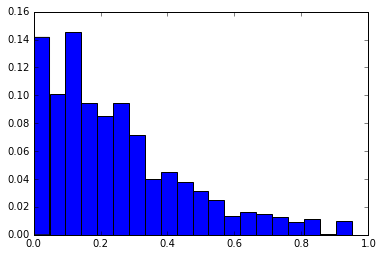

In [99]:
# generate eccentricity distribution mirroring above histogram
from IPython.core.debugger import Tracer
n = 1
ecc_list = np.array([])
while n <= 10000:
    r = (np.random.sample(1)) #some y value (percentage)
    #Tracer()()
    if r <= 0.149171270718232:
        bin_lower=0.0
        bin_upper=0.05
    else:
        r_mask = np.where(y<=r)
        x_below = x[r_mask]
        x_below = np.append(x_below,x_below[-1]+0.05)
        bin_upper = x_below[-1]+0.05
        bin_lower = x_below[-2]+0.05
    rand = np.random.uniform(0,0.05,1)
    ecc = bin_lower + rand 
    ecc_list=np.append(ecc_list,ecc)
    n += 1
    continue
#too_big = np.where(x>1)
#np.delete(ecc_list,ecc_list[too_big])
print (ecc_list,ecc_list[too_big].shape)
fig,ax = plt.subplots(1,1)
plt.hist(ecc_list,bins=20,weights=np.zeros_like(ecc_list)+1./ecc_list.size)

In [ ]:
# now to generate ICs and their files. 
mass = np.array([]) #if radius < 2 R_sun, then mass = ((R/R_earth)**(3.68))*M_earth; if larger, density = 1g/cm**3
stellar_mass = np.random.uniform(0.7,1.4,25000) # [0.7,1.4] M_sun
stellar_radius = np.random.uniform(0.7,1.4,25000) #[0.7,1.4] R_sun
radius = np.random.uniform(0.5,10,25000) # [0.5,10] R_earth;  
Qr = np.array([]) # [30,300]
Qg = np.array([]) # [10**6,10**7]
Qs = np.random.uniform(10**6,10**7,25000) # [10**6,10**7]
Period = np.array([])
semi = np.random.uniform(0.01,0.15,25000) # [0.01,0.15] AU
Ages = np.random.uniform(2*10**9,8*10**9,25000) # [2,8] Gyrs

#calculating masses
